    Denne opgave er en del af NumPy-tutorials fra deres officielle hjemmeside. Du skal læse dokumentet igennem og lave så mange af øvelserne som muligt. Til sidst kan du finde alle svarene her:
https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html
    
# Bestemmelse af Moore’s lov med rigtige data i NumPy
Gordon Moore fremsatte en empirisk forudsigelse om, at antallet af transistorer på en computerchip ville fordobles hvert andet år. Denne forudsigelse blev kendt som Moore’s lov. Gordon Moore havde oprindeligt kun forventet, at denne empiriske sammenhæng ville gælde fra 1965 til 1975 [[1](https://en.wikipedia.org/wiki/Moore%27s_law),[2](https://spectrum.ieee.org/computing/hardware/gordon-moore-the-man-whose-name-means-progress)],men semiconductor producenter var i stand til at følge Moore’s lov helt frem til 2015.

I denne opgave skal du:

- Læs og analysere rigtige data for antal transistor i semiconductor over tid,
- Sammenligne Moores forudsigelse med de rigtige data,
- Visualisere udviklingen grafisk ved hjælp af NumPy og Matplotlib,

## Hvad du skal bruge
Du vil anvende disse NumPy- og Matplotlib-funktioner:

- `np.loadtxt`: indlæser tekst i et NumPy-array
- `np.log`: tager den naturlige logaritme af alle elementer i et NumPy-array
- `np.exp`: tager den eksponentielle funktion af alle elementer i et NumPy-array
- `lambda`: en minimal funktionsdefinition til at lave en model-funktion
- `plt.semilogy`: plotter x-y-data med lineær x-akse og logaritmisk y-akse
- `plt.plot`: plotter x-y-data med lineære akser
- `array-slicing`
- `boolean array indexing`
- `np.block`: kombiner arrays til 2D-arrays
- `np.newaxis`: ændrer et 1D-array til en række- eller kolonnevektor
- `np.savez` og `np.savetxt`: gemmer arrays i henholdsvis komprimeret NumPy-format og som tekst

## Del 1: læs data

I repo findes en CSV fil, "Moores_Law.csv" hentet fra [transistor count](http://www.transistorcount.com/#2020s)

1. Brug kommandoen `!head Moores_Law.csv` til at se de første linjer af CSV-filen. Hvad er overskrifterne for kolonnerne?
2. Indlæs CSV-filen. Du behøver ikke de kolonner, der angiver Processor, Designer, MOSprocess eller Area. Du skal kun bruge den anden og tredje kolonne, nemlig **Transistors** og **Date**. Dernæst skal du indlæse disse to kolonner i et NumPy-array `data` ved hjælp af `np.genfromtxt`. De ekstra indstillinger nedenfor sørger for, at data kommer i det ønskede format:

- delimiter=',': angiver komma ',' som separator i CSV-filen
- usecols=[1,2]: importerer den anden og tredje kolonne fra CSV-filen
- skip_header=1: springer den første række over, fordi den er en overskriftsrække (header)

Du har nu indlæst hele historien om semiconductor i et NumPy-array kaldet `data`. Den første kolonne indeholder antallet af MOS-transistorer, og den anden kolonne indeholder introduktionsåret skrevet med fire cifre.

3. Du skal gøre dataene lettere at læse og arbejde med ved at tildele de to kolonner til variablerne `year` og `transistor_count`. Udskriv de første 10 værdier ved at anvende slicing [:10] på year- og transistor_count-arrays.
Udskriv derefter disse værdier for at tjekke, at du har gemt dataene i de rigtige variabler.

## Del 2: data analyse

1. Brug `np.log` til at tage den naturlige logaritme af antal transistor der gemmes i `transistor_count`.
2. Tegn et scatter-plot af årstal `year` (x-akse) mod  `log_transistor_count` (y-akse).
3. Brug `stats.linregress` fra **scipy** til at lave et lineært fit på log-data og tegn i den samme plot. Hvad ser du? Passer punkterne nogenlunde til en ret linje?

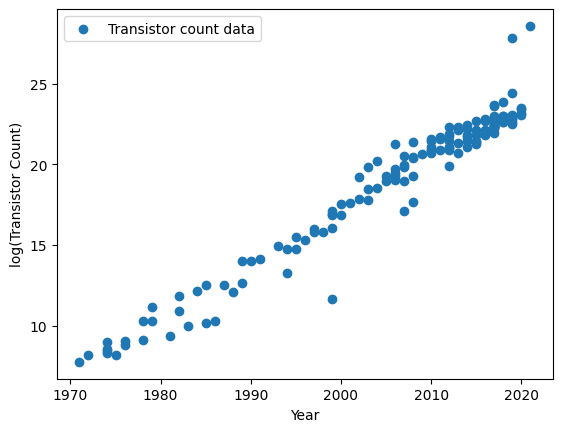

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = np.genfromtxt('Moores_Law.csv', delimiter=',', usecols=[1, 2], skip_header=1)
transistor_count = data[:, 0]
year = data[:, 1]

log_transistor_count = np.log(transistor_count)

plt.scatter(year, log_transistor_count, label = 'Transistor count data')

slope, intercept, r_value, p_value, std_err = stats.linregress(year, log_transistor_count)
plt.plot(year, slope * year + intercept)

plt.xlabel('Year')
plt.ylabel('log(Transistor Count)')
plt.legend()
plt.show()


## Del 3: Sammenlign med Moore’s law
Din empiriske model antager, at antallet af transistorer pr. semiconductor følger en eksponentiel vækst,

$$ transistor\_count = a\cdot b^{t-t_0}$$ 

hvor $a$ og  $b$ er konstanter, der beskriver en fordobling af antal transistor hvert andet år, og hvor udgangspunktet er 2250 transistorer i 1971. Funktionen kan afbildes som en ret linje i et enkeltlogaritmisk koordinatsystem

$$\log(transister\_count) = f(year) = AM \cdot year+BM$$

hvor $A$ and $B$ tilpasningskonstanter (fitting constants).

1. Udregn *AM* og *BM* og lav en lambda-funktion kaldet `moores_law`, som beregner antallet af transistorer pr. chip efter Moore’s lov med `year`  som inputparameter.
2. Plot både de rigtige data (scatter) og regression modellen (kurve) i samme figur på log-skala
3. Tegn også Moore’s kurve i grafen og sammenlign med dine data.

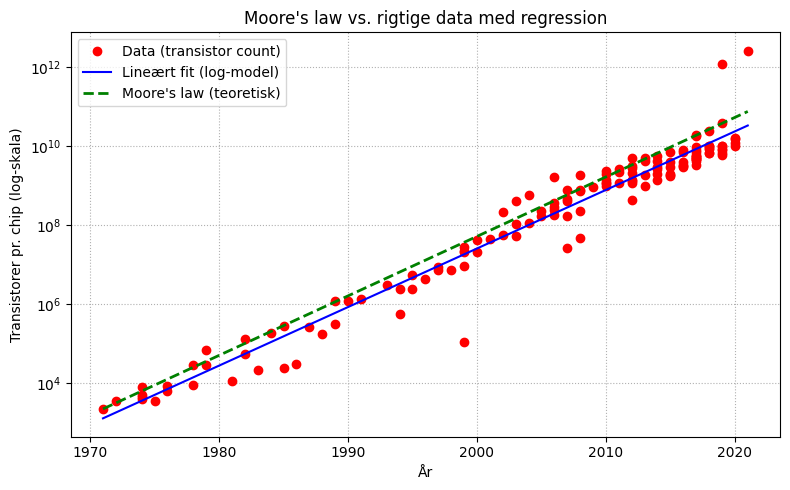

AM: 0.34657359027997264
BM : -675.3778609466276
Slope fra regression: 0.34117762041141386
Intercept fra regression: -665.290589637243
R^2 værdi: 0.956
Gns. afvigelse: 100.1%


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = np.genfromtxt('Moores_Law.csv', delimiter=',', skip_header=1, usecols=(1, 2), dtype=float, filling_values=np.nan)
data = data[~np.isnan(data).any(axis=1)]

transistor_count = data[:, 0]
year = data[:, 1]

# det første vi gør er at lave en lineær regression
# vi tager logoritmen af transistor_count og laver en lineær regression på (year, log(transistor_count)) vi genbruger fra del 2
log_tc = np.log(transistor_count)
slope, intercept, r_value, p_value, std_err = stats.linregress(year, log_tc)


# her starter vi med at definere konstanterne Moore's lov parametre, vi starter med 2250 transistorer i 1971 og fordobler hvert andet år
a0 = 2250
t0 = 1971
b = 2

# med vores konstanter kan vi nu beregne AM og BM

AM = np.log(b) / 2
BM = np.log(a0) - AM * t0

# nu kan vi dermed lave en lambda-funktion kaldet moores_law, som beregner antallet af transistorer pr. chip efter Moore’s lov med year som inputparameter.
moores_law = lambda y: np.exp(AM * y + BM)

x = np.linspace(year.min(), year.max(), 100)
log_fit = slope * x + intercept

moores_vaerdier = moores_law(year)

afvigelse_pct = 100 * (transistor_count - moores_vaerdier) / moores_vaerdier

# nu kan vi begynde at plotte det hele
plt.figure(figsize=(8,5))
plt.semilogy(year, transistor_count, 'o', color='red', label='Data (transistor count)')
plt.semilogy(x, np.exp(log_fit), color='blue', linestyle='-', label='Lineært fit (log-model)')
plt.semilogy(x, moores_law(x), color='green', linestyle='--', linewidth=2, label="Moore's law (teoretisk)")

# opsætning af plottet
plt.xlabel('År')
plt.ylabel('Transistorer pr. chip (log-skala)')
plt.title("Moore's law vs. rigtige data med regression")
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()



#ekstra nice to have info
print(f"AM: {AM}")
print(f"BM : {BM}")
print(f"Slope fra regression: {slope}")
print(f"Intercept fra regression: {intercept}")
print(f"R^2 værdi: {r_value**2:.3f}")
print(f"Gns. afvigelse: {np.mean(np.abs(afvigelse_pct)):.1f}%")

